# Rate-coded neuron

Download the Jupyter notebook: [RC.ipynb](https://raw.githubusercontent.com/ANNarchy/CNS2023/master/src/notebooks/RateCoded.ipynb) or run it directly on [colab.](https://colab.research.google.com/github/ANNarchy/CNS2023/blob/master/src/notebooks/RateCoded.ipynb){target="_blank"}

To install ANNarchy on colab, uncomment this line and run it:

In [1]:
#!pip install ANNarchy

We start by importing numpy and matplotlib, as well as ANNarchy:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from ANNarchy import *

ANNarchy 4.7 (4.7.2.5) on darwin (posix).


When the network has been already compiled and you want to modify its architecture, you should call the `clear()` method of ANNarchy. In a script, this never happens, but Jupyter notebooks are not linear. In case of doubt, always run this cell or even restart the notebook.

In [3]:
clear()

Let's now define a simple leaky integrator with added noise:

$$
    \tau \, \frac{d x(t)}{dt} + x(t) = I(t) + \xi(t)
$$

$$
    r(t) = \tanh(x(t))
$$

The input `I(t)` is neuron-specific and set externally. Such a neuron can be implemented as:

In [4]:
Leaky = Neuron(
    parameters = """
        I = 0.0                     # Input (neuron-specific)
        tau = 30.0   : population   # Time constant 
        noise = 0.1 : population   # Noise level
    """,
    equations="""
        tau * dx/dt + x = I + noise * Uniform(-1, 1)  : init=0.0
 
        r = tanh(x)
    """
)

We can know implement a population of 10 such neurons:

In [5]:
pop = Population(10, Leaky)

We record both variables 'x' and 'r':

In [6]:
m = Monitor(pop, ['x', 'r'])

These neurons will not be connected with each other, so we can already compile the "network":

In [7]:
compile()

Compiling ...  OK 


The neural variable `I` is initially 0. We now define a simple stimulation protocol where each neuron receives a random but fixed input for 200 ms in the middle of a trial. 

In [8]:
simulate(200.)

pop.I = np.random.uniform(-1.0, 1.0, 10)

simulate(200.)

pop.I = 0.0

simulate(200.)

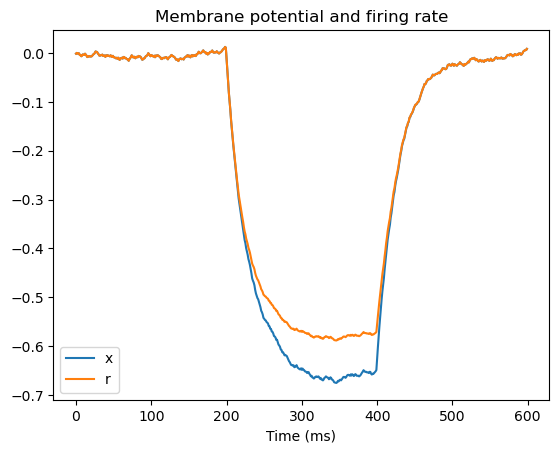

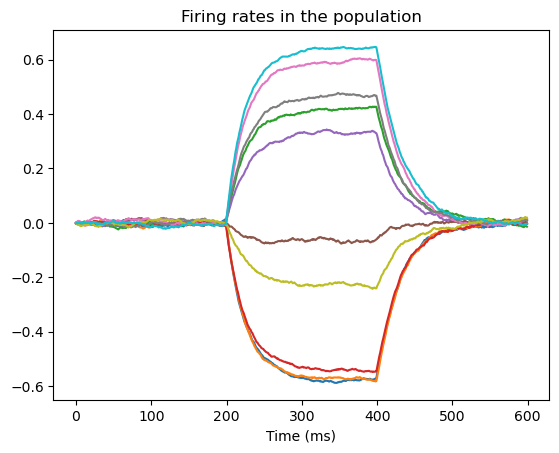

In [9]:
recordings = m.get()

plt.figure()
plt.plot(recordings['x'][:, 0], label='x')
plt.plot(recordings['r'][:, 0], label='r')
plt.legend()
plt.xlabel('Time (ms)')
plt.title('Membrane potential and firing rate')

plt.figure()
for i in range(10):
    plt.plot(recordings['r'][:, i])
plt.xlabel('Time (ms)')
plt.title('Firing rates in the population')

plt.show()

**Experiments:**

1. Change the transfer function of the neurons in their definition, for example to sigmoid / logistic:

```python
r = 1.0 / (1.0 + exp(-x))
```

or ReLU:

```python
r = x : min = 0.0
```

and observe the consequence on the firing rates, especially for negative membrane potentials.

Do not forget to run `clear()` after each change to the neuron definition and to recompile!